
    1  Data Preparation
    2 Clustering Analysis
    3 Cluster Visualisation
    4 Visualise data
    5 What insights can be drawn from the price difference trends across the two years?
    0 to exit
    : 3


/tmp/ipykernel_185/3453148968.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = kmeans.fit_predict(df_selected)


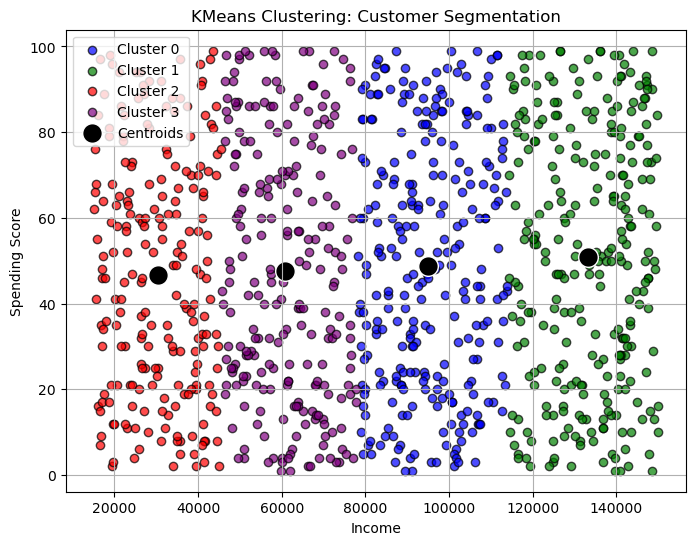

'\n4. Interpretation and Summary\na. Write a short summary (3–5 lines) explaining the number of clusters formed and the\napparent characteristics of each cluster.\n(2 Marks)\nb. Discuss how this clustering output might assist the retailer in tailoring advertisements for\ndifferent customer groups.\n(2 Marks)'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
'''Instructions
1. Data Preparation
a. Load the dataset into a Pandas dataframe.(1 Mark)
b. Identify and remove any rows containing missing (null) values.(1 Mark)
c. Drop all columns except the 'Income' and 'Spending Score' columns.(1 Mark)
d. Display a visual scatter plot of the remaining features to examine initial patterns.(2 Marks)
'''
def instructions ():
# a. Loads the dataset 
    df = pd.read_csv("customer_segmentation.csv", sep=";") 
# b. removes rows containing missing values
    df_cleaned = df.dropna()
# c. Drop all columns except 'Income' and 'Spending Score'
    df_selected = df_cleaned[['income', 'spending_score']]
# d. Display a scatter plot to examine patterns
    plt.figure(figsize=(8, 6))
    plt.scatter(df_selected['income'], df_selected['spending_score'], alpha=0.7, c='blue', edgecolors='black')
    plt.xlabel("Income")
    plt.ylabel("Spending Score")
    plt.title("Customer Segmentation: Income vs Spending Score")
    plt.grid(True)
    plt.show()
    askUser()
'''
2. Clustering Analysis
a. Apply the elbow method to determine an appropriate number of clusters.
Use KMeans clustering from sklearn.cluster for this step.
Plot the Within-Cluster-Sum-of-Squares (WCSS) for different values of k (e.g., 1 to 10) to
determine the optimal number of clusters.
(7 Marks)'''
def clusterAnalysis ():
    df = pd.read_csv("customer_segmentation.csv", sep=";")  

# Clean data
    df_cleaned = df.dropna()
    df_selected = df_cleaned[['income', 'spending_score']]

# Apply KMeans clustering and compute Within-Cluster-Sum-of-Squares (WCSS)
    wcss = []  # Stores WCSS values for different k values

    for k in range(1, 11):  # Checking for k from 1 to 10
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(df_selected)
        wcss.append(kmeans.inertia_)  # Append WCSS for this k

# Plot the elbow method graph
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("WCSS")
    plt.title("Elbow Method for Optimal Clusters")
    plt.xticks(range(1, 11))
    plt.grid(True)
    plt.show()

'''
3. Cluster Visualisation
a. Apply KMeans clustering using the optimal number of clusters determined in the previous
step.
b. Plot the resulting clusters using different colours for each cluster.
(10 Marks)
c. Mark the centroids of the clusters on the plot using a distinct marker or colour.
(4 Marks)'''
def clusterVis():
    df = pd.read_csv("customer_segmentation.csv", sep=";")  
    df_cleaned = df.dropna()
    df_selected = df_cleaned[['income', 'spending_score']]

    optimal_k = 4  # Example value, replace based on elbow method results
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    df_selected['Cluster'] = kmeans.fit_predict(df_selected)

# Extract cluster centroids
    centroids = kmeans.cluster_centers_

# Plot clustering results
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'cyan', 'brown', 'gray', 'yellow']

    for cluster in range(optimal_k):
        cluster_data = df_selected[df_selected['Cluster'] == cluster]
        plt.scatter(cluster_data['income'], cluster_data['spending_score'], label=f'Cluster {cluster}', alpha=0.7, edgecolors='black', color=colors[cluster])

# Mark centroids with distinct markers
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, c='black', edgecolors='white', label='Centroids')

# Formatting the plot
    plt.xlabel("Income")
    plt.ylabel("Spending Score")
    plt.title("KMeans Clustering: Customer Segmentation")
    plt.legend()
    plt.grid(True)
    plt.show()

def askUser ():
    
    getting = 0
    getting = input("""
    1  Data Preparation
    2 Clustering Analysis
    3 Cluster Visualisation
    4 Visualise data
    5 What insights can be drawn from the price difference trends across the two years?
    0 to exit
    :""")

    match getting:
        case "1":
            instructions ()
            
        case "2":
            clusterAnalysis ()
        case "3":
            clusterVis()
        case "4":
            visualize_fuel_prices(file_path)
        case "5":
            print("C")
        case "0":
            exit()
askUser()
